# **K-Means Clustering with US Charities**
### **Data obtained from charitynavigator.org**

In [1]:
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('charity_navigator_clean.csv', index_col = 0)

Create a dataframe with no null values.

In [4]:
df = df[df['comp_leader_income'].isnull() == False].reset_index(drop = True)

In [5]:
df.head()

,accountability_score,administrative_expenses,charity_name,charity_url,city,cn_advisory,comp_leader_income,comp_leader_expense_pct,comp_leader_title,excess_or_deficit_for_year,...,net_assets,other_revenue,overall_score,payments_to_affiliates,program_expenses,state,total_contributions,org_type,org_category,org_type_id
0,89.0,164590.0,9to5 National Association of Working Women,https://www.charitynavigator.org/index.cfm?bay...,Milwaukee,NaN,53463.0,3.11,Executive Director,349718.0,...,1350382,49634.0,89.75,0,1440463,WI,1999023,Human and Civil Rights,Advocacy and Education,1.0
1,86.0,1001560.0,'Aha Pūnana Leo,https://www.charitynavigator.org/index.cfm?bay...,Hilo,NaN,73500.0,1.47,Executive Director,1175965.0,...,14773920,382540.0,85.95,0,3912270,HI,3339358,Education,Early Childhood Programs and Services,2.0
2,85.0,93957.0,AID FOR AIDS International,https://www.charitynavigator.org/index.cfm?bay...,New York,NaN,85000.0,0.99,Executive Director,-461502.0,...,-770370,0.0,80.96,0,8157850,NY,8039138,International,Development and Relief Services,3.0
3,86.0,346867.0,Futures in Education,https://www.charitynavigator.org/index.cfm?bay...,Brooklyn,NaN,61220.0,0.78,Acting Executive Director,1872733.0,...,11460087,-81726.0,89.94,0,7018262,NY,9704138,Education,Scholarship and Financial Support,2.0
4,97.0,135195.0,Every Generation Ministries,https://www.charitynavigator.org/index.cfm?bay...,Temecula,NaN,74244.0,5.41,President,-103940.0,...,723772,32436.0,90.62,0,1148407,CA,1234662,Religion,Religious Activities,4.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7290 entries, 0 to 7289
Data columns (total 22 columns):
accountability_score          7290 non-null float64
administrative_expenses       7290 non-null float64
charity_name                  7288 non-null object
charity_url                   7290 non-null object
city                          7289 non-null object
cn_advisory                   4 non-null object
comp_leader_income            7290 non-null float64
comp_leader_expense_pct       7290 non-null float64
comp_leader_title             7290 non-null object
excess_or_deficit_for_year    7290 non-null float64
financial_score               7290 non-null float64
fundraising_expenses          7290 non-null int64
net_assets                    7290 non-null int64
other_revenue                 7290 non-null float64
overall_score                 7290 non-null float64
payments_to_affiliates        7290 non-null int64
program_expenses              7290 non-null int64
state                    

In [7]:
df.describe()

,accountability_score,administrative_expenses,comp_leader_income,comp_leader_expense_pct,excess_or_deficit_for_year,financial_score,fundraising_expenses,net_assets,other_revenue,overall_score,payments_to_affiliates,program_expenses,total_contributions,org_type_id
count,7290.000000,7.290000e+03,7.290000e+03,7290.000000,7.290000e+03,7290.000000,7.290000e+03,7.290000e+03,7.290000e+03,7290.000000,7.290000e+03,7.290000e+03,7.290000e+03,7290.000000
mean,91.338683,1.294414e+06,1.659498e+05,3.543462,9.060532e+05,85.966429,1.070673e+06,3.219307e+07,1.190769e+06,87.178483,1.977978e+04,1.345123e+07,1.286215e+07,6.705898
std,8.873393,6.049582e+06,1.298927e+05,2.384256,1.180910e+07,9.940291,6.142220e+06,1.752289e+08,7.803896e+06,7.777421,2.624573e+05,6.457635e+07,6.028956e+07,2.727216
min,24.000000,9.440000e+02,1.000000e+00,0.000000,-2.691435e+08,0.000000,1.301000e+03,-1.290334e+07,-1.391081e+07,18.950000,-4.101700e+04,7.718300e+04,9.063000e+04,1.000000
25%,89.000000,1.945552e+05,9.155775e+04,1.610000,-2.368478e+05,81.180000,1.605952e+05,2.088086e+06,1.116200e+04,83.730000,0.000000e+00,1.683411e+06,1.701188e+06,5.000000
50%,93.000000,3.732055e+05,1.311865e+05,3.150000,6.882200e+04,87.500000,3.264685e+05,5.658102e+06,1.145770e+05,88.530000,0.000000e+00,3.211320e+06,3.273303e+06,8.000000
75%,97.000000,8.588372e+05,1.977418e+05,5.120000,6.325405e+05,92.500000,7.113882e+05,1.631770e+07,4.977250e+05,92.020000,0.000000e+00,7.953149e+06,7.657308e+06,9.000000
max,100.000000,2.569202e+08,2.013535e+06,9.990000,4.531299e+08,100.000000,3.377669e+08,7.551342e+09,3.903250e+08,100.000000,1.679144e+07,2.499301e+09,2.379130e+09,11.000000


Add dummy variables for organization type.

In [8]:
org_type_dummies = pd.get_dummies(df.org_type)
df = pd.concat([df, org_type_dummies], axis = 1, join = 'outer')

Drop non-numerical variables from the dataframe.

In [9]:
df.drop(['charity_name', 'charity_url', 
          'city', 'cn_advisory', 
          'state', 'org_category', 'comp_leader_title'], 
         axis = 1, inplace = True)
df.head()

,accountability_score,administrative_expenses,comp_leader_income,comp_leader_expense_pct,excess_or_deficit_for_year,financial_score,fundraising_expenses,net_assets,other_revenue,overall_score,...,"Arts, Culture, Humanities",Community Development,Education,Environment,Health,Human Services,Human and Civil Rights,International,Religion,Research and Public Policy
0,89.0,164590.0,53463.0,3.11,349718.0,90.56,111522,1350382,49634.0,89.75,...,0,0,0,0,0,0,1,0,0,0
1,86.0,1001560.0,73500.0,1.47,1175965.0,85.92,54613,14773920,382540.0,85.95,...,0,0,1,0,0,0,0,0,0,0
2,85.0,93957.0,85000.0,0.99,-461502.0,77.65,248833,-770370,0.0,80.96,...,0,0,0,0,0,0,0,1,0,0
3,86.0,346867.0,61220.0,0.78,1872733.0,97.50,384550,11460087,-81726.0,89.94,...,0,0,1,0,0,0,0,0,0,0
4,97.0,135195.0,74244.0,5.41,-103940.0,87.08,87436,723772,32436.0,90.62,...,0,0,0,0,0,0,0,0,1,0


## **Predicting positive or negative 2017 profit for US charities**

In [10]:
n = 0
for excess_or_deficit in df['excess_or_deficit_for_year']:
    if df.loc[n, 'excess_or_deficit_for_year'] > 0:
        df.loc[n, 'excess_or_deficit_id'] = str(1)
        n += 1
    elif df.loc[n, 'excess_or_deficit_for_year'] <= 0:
        df.loc[n, 'excess_or_deficit_id'] = str(0)
        n += 1

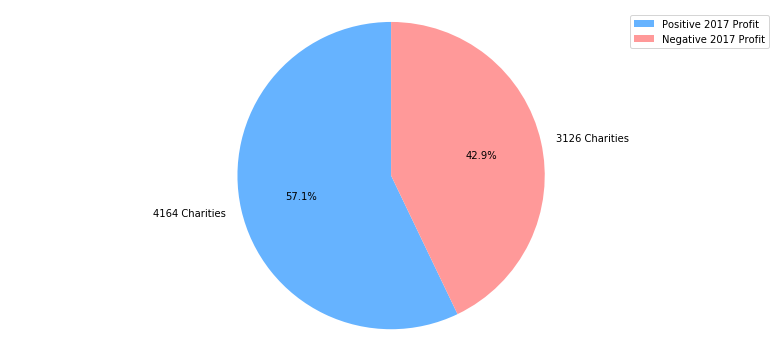

In [11]:
plt.figure(figsize = (11, 5))
labels = [str(df['excess_or_deficit_id'].value_counts()[0]) + ' Charities', 
          str(df['excess_or_deficit_id'].value_counts()[1]) + ' Charities']
plt.pie(df['excess_or_deficit_id'].value_counts(), 
        labels = labels, 
        colors = ['#66b3ff', '#ff9999'],
        autopct = '%1.1f%%', startangle = 90)
plt.legend(['Positive 2017 Profit', 'Negative 2017 Profit'], loc = "best")
plt.axis('equal')
plt.tight_layout()

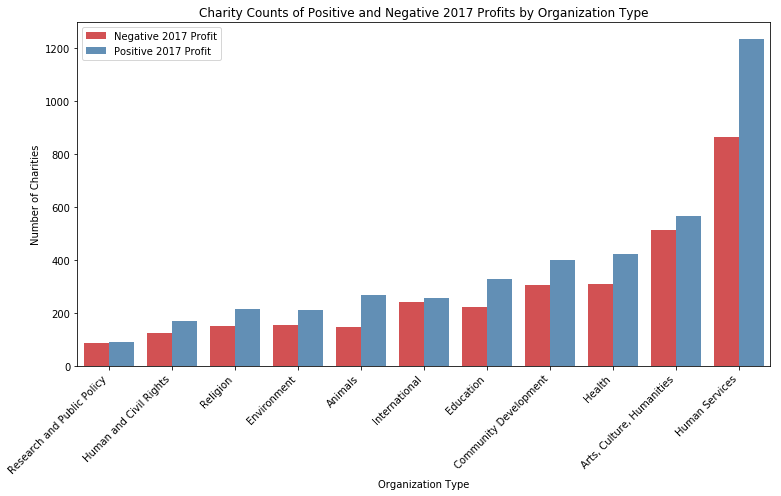

In [12]:
plt.figure(figsize = (11, 7))

ax = sns.countplot(x = 'org_type_id', hue = 'excess_or_deficit_id',
                   data = df, palette = 'Set1', alpha = 0.85,
                   order = reversed(df['org_type_id'].value_counts().index))
ax.set_xlabel('Organization Type')
ax.set_ylabel('Number of Charities')
ax.set_title('Charity Counts of Positive and Negative 2017 Profits by Organization Type')
ax.set_xticklabels(reversed(df['org_type'].value_counts().index),
                   rotation = 45, ha = "right")
plt.legend(['Negative 2017 Profit', 'Positive 2017 Profit'])
plt.tight_layout()

### **Train Test Split**

In [13]:
from sklearn.model_selection import train_test_split

All numerical features including org type dummy variables are included.

In [14]:
feature_names = ['accountability_score', 'financial_score',
                 'overall_score', 'administrative_expenses',
                 'fundraising_expenses', 'net_assets',
                 'other_revenue', 'payments_to_affiliates',
                 'comp_leader_income', 'comp_leader_expense_pct',
                 'Animals', 'Arts, Culture, Humanities',
                 'Community Development', 'Education',
                 'Environment', 'Health', 'Human Services',
                 'Human and Civil Rights', 'International',
                 'Religion']
X = df[feature_names]
y = df['excess_or_deficit_id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

### **Standard Scaler**

First use a standard scaler to level all features in the model.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Create a dataframe to see scaled features.

In [17]:
df_scaled_features = pd.DataFrame(X_train_scaled, columns = X.columns)
df_scaled_features2 = pd.DataFrame(X_test_scaled, columns = X.columns)
df_scaled_features = pd.concat([df_scaled_features, df_scaled_features2], axis = 1, join = 'outer')
df_scaled_features.head()

,accountability_score,financial_score,overall_score,administrative_expenses,fundraising_expenses,net_assets,other_revenue,payments_to_affiliates,comp_leader_income,comp_leader_expense_pct,...,Animals,"Arts, Culture, Humanities",Community Development,Education,Environment,Health,Human Services,Human and Civil Rights,International,Religion
0,0.523977,0.794084,0.977527,1.416871,0.885268,0.290553,-0.089992,-0.075257,0.007558,-1.394520,...,-0.243064,-0.413244,-0.325487,-0.283784,-0.235588,-0.336121,1.560762,-0.207767,-0.268927,-0.237206
1,0.971347,0.136413,0.490523,-0.150319,0.024736,-0.116007,-0.299356,-0.075257,0.614274,0.028344,...,-0.243064,2.419876,-0.325487,-0.283784,-0.235588,-0.336121,-0.640713,-0.207767,-0.268927,-0.237206
2,0.971347,-0.355110,0.046528,-0.101158,-0.106470,-0.118849,-0.136323,-0.075257,-0.021811,0.197229,...,-0.243064,2.419876,-0.325487,-0.283784,-0.235588,-0.336121,-0.640713,-0.207767,-0.268927,-0.237206
3,-3.166823,-2.782065,-3.394119,-0.120767,-0.074416,-0.147770,-0.153193,-0.075257,-0.230468,1.856533,...,-0.243064,-0.413244,-0.325487,-0.283784,-0.235588,2.975122,-0.640713,-0.207767,-0.268927,-0.237206
4,0.188450,0.008835,0.227415,0.377612,0.032822,0.547113,0.209070,-0.075257,2.738364,-0.410760,...,-0.243064,2.419876,-0.325487,-0.283784,-0.235588,-0.336121,-0.640713,-0.207767,-0.268927,-0.237206


### **K-Means Clusreing**

#### *Will k-means clustering...?*

In [18]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [19]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_train_scaled, y_train)
y_pred = kmeans.predict(X_test_scaled)
kmeans.cluster_centers_

array([[-7.95390059e-01, -7.50565178e-01, -9.78754551e-01,
        -1.23000558e-01, -7.81660490e-02, -1.29469102e-01,
        -1.20482270e-01, -4.27285052e-02, -2.68503367e-01,
         5.42862794e-01, -9.43424207e-02,  3.45957822e-01,
        -1.33018801e-01,  2.03800431e-02, -1.32556176e-03,
         2.69858401e-02, -3.32154501e-01,  7.29919648e-02,
        -7.20176972e-02,  3.41645852e-01],
       [ 3.65449487e-01,  3.44854271e-01,  4.49698037e-01,
         5.65137700e-02,  3.59141306e-02,  5.94858035e-02,
         5.53567187e-02,  1.96320159e-02,  1.23366412e-01,
        -2.49423446e-01,  4.33465176e-02, -1.58953594e-01,
         6.11167464e-02, -9.36380360e-03,  6.09041891e-04,
        -1.23988995e-02,  1.52611527e-01, -3.35368487e-02,
         3.30892122e-02, -1.56972418e-01]])

In [20]:
print('Train R^2:', kmeans.score(X_train_scaled, y_train).round(4))
print('Test  R^2:', kmeans.score(X_test_scaled, y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: -81531.1919
Test  R^2: -48707.2117
MAE:       0.4393
MSE:       0.4393
RMSE:      0.6628


In [21]:
print(metrics.classification_report(y_test.astype(int), y_pred))
print(metrics.confusion_matrix(y_test.astype(int), y_pred))

             precision    recall  f1-score   support

          0       0.48      0.35      0.40      1245
          1       0.60      0.72      0.65      1671

avg / total       0.55      0.56      0.55      2916

[[ 435  810]
 [ 471 1200]]
